### This notebook calculates the physical size of the HWO spatial resolution and compares it to other observatories. 

First we have to import the basics we will need for calcuations and plots. 

In [4]:
from hwo_sci_eng.utils import read_yaml 
import astropy.units as u, numpy as np 
import matplotlib.pyplot as plt 
from astropy.cosmology import Planck18 
import matplotlib.ticker as ticker

Now we will create similar information for JWST and HST. This includes the three EACs and a user-defined "my_telescope" for which you can set your own favorite size and diffraction limited wavelength.  

In [5]:
eac1 = {'effective_aperture': 6.54 * u.m, 'diff_limited_wavelength':0.5 * u.micron} 
eac2 = {'effective_aperture': 6.0  * u.m, 'diff_limited_wavelength':0.5 * u.micron} 
eac3 = {'effective_aperture': 8.0  * u.m, 'diff_limited_wavelength':0.5 * u.micron} 

my_telescope = {'effective_aperture': 12.0  * u.m, 'diff_limited_wavelength':0.5 * u.micron} 

hst =  {'effective_aperture': 2.4  * u.m, 'diff_limited_wavelength':0.5 * u.micron} 
jwst = {'effective_aperture': 6.5  * u.m, 'diff_limited_wavelength':1.1 * u.micron} 

Set up a 1D array of redshifts, and convert to distance using the cosmology model. 

In [6]:
log_redshift = np.arange(1001)/100. - 9. 
redshift = 10.**log_redshift
distance = (Planck18.comoving_distance(redshift)).to(u.kpc) 

Create a function that generates physical sizes of the diffraction limited resolution element that we can use for different telescopes. 

In [7]:
def get_psf_size(telescope, redshift): 
    psf_fwhm = 1.22 * u.rad * telescope['diff_limited_wavelength'].to(u.m) / telescope['effective_aperture'] * (206265. / u.rad * u.arcsec)
    parsecs_per_arcsec = ( Planck18.kpc_proper_per_arcmin(redshift) ).to('parsec/arcsec') 
    size_of_psf = psf_fwhm * parsecs_per_arcsec
    return size_of_psf

In [8]:
hst_size = get_psf_size(hst, redshift) 
jwst_size = get_psf_size(jwst, redshift) 
eac1_size = get_psf_size(eac1, redshift) 
eac2_size = get_psf_size(eac2, redshift)
eac3_size = get_psf_size(eac3, redshift) 
my_telescope_size = get_psf_size(my_telescope, redshift) 

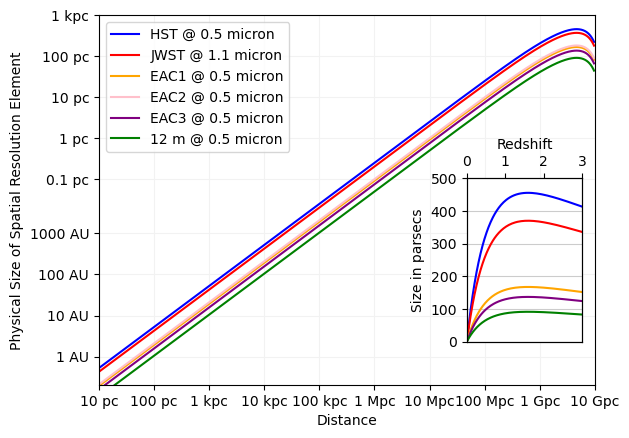

In [9]:
fig, ax = plt.subplots()

ax.plot(np.log10(distance.value), np.log10(hst_size.value), label='HST @ 0.5 micron', color='blue') 
ax.plot(np.log10(distance.value), np.log10(jwst_size.value), label='JWST @ 1.1 micron', color='red') 
ax.plot(np.log10(distance.value), np.log10(eac1_size.value), label='EAC1 @ 0.5 micron', color='orange') 
ax.plot(np.log10(distance.value), np.log10(eac2_size.value), label='EAC2 @ 0.5 micron', color='pink')  
ax.plot(np.log10(distance.value), np.log10(eac3_size.value), label='EAC3 @ 0.5 micron', color='purple') 
ax.plot(np.log10(distance.value), np.log10(my_telescope_size.value), label='12 m @ 0.5 micron', color='green') 

plt.xlim(-2, 7)
plt.ylim(-6, 3) 
plt.xlabel('Distance')  
plt.ylabel('Physical Size of Spatial Resolution Element') 
ax = plt.gca()  
ax.yaxis.set_major_locator(ticker.FixedLocator([np.log10(( 1. * u.au).to(u.pc).value ) , np.log10((10. * u.au).to(u.pc).value), np.log10(( 100. * u.au).to(u.pc).value ) , np.log10((1000. * u.au).to(u.pc).value ) , -1, 0, 1, 2, 3]))
ax.xaxis.set_major_locator(ticker.FixedLocator([-2,-1,0,1,2,3,4,5,6,7])) 
plt.legend() 
_ = ax.set_xticklabels(['10 pc', '100 pc', '1 kpc', '10 kpc', '100 kpc', '1 Mpc', '10 Mpc', '100 Mpc', '1 Gpc', '10 Gpc'])
_ = ax.set_yticklabels(['1 AU', '10 AU', '100 AU', '1000 AU', '0.1 pc', '1 pc', '10 pc', '100 pc', '1 kpc'])
plt.grid(axis='x', color='0.95')
plt.grid(axis='y', color='0.95')

ax2 = fig.add_axes([0.7, 0.2, 0.18, 0.34])
ax2.set_xlim(0, 3)
ax2.set_ylim(0,500)
ax2.get_xaxis().set_visible(False)
ax2.plot(redshift, hst_size.value, color='blue') 
ax2.plot(redshift, jwst_size.value, color='red') 
ax2.plot(redshift, eac1_size.value, color='orange') 
ax2.plot(redshift, eac3_size.value, color='purple') 
ax2.plot(redshift, my_telescope_size.value, color='green') 
ax2.grid(axis='x', color='0.95')
ax2.grid(axis='y', color='0.8')
ax2.set_ylabel('Size in parsecs') 
_ = ax2.set_xlabel('Redshift') 

# top redshift axis 
z_ax = ax2.twiny()
z_ax.set_xlim(ax2.get_xlim())
z_ax.xaxis.set_major_locator(ticker.FixedLocator([0, 1, 2, 3])) 
_ = z_ax.set_xlabel('Redshift') 